In [72]:
import pandas as pd
import os, itertools

from sklearn.utils import shuffle
from sklearn import tree, svm
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score



In [9]:

data = pd.read_csv('HW7_2.csv')

# Y = data['fraud_ind']
# X = data.drop(['fraud_ind'], axis=1)
ecfg = pd.get_dummies(data.ecfg)
flbmk = pd.get_dummies(data.flbmk)
flg_3dsmk = pd.get_dummies(data.flg_3dsmk)
insfg = pd.get_dummies(data.insfg)
ovrlt = pd.get_dummies(data.ovrlt)

data = data.drop(['flbmk'], axis = 1)
dummy_ecfg = ecfg['Y'].tolist()
dummy_flg_3dsmk = flg_3dsmk['Y'].tolist()
dummy_insfg = insfg['Y'].tolist()
dummy_ovrlt = ovrlt['Y'].tolist()

data['ecfg'] = dummy_ecfg
data['flg_3dsmk'] = dummy_flg_3dsmk
data['insfg'] = dummy_insfg
data['ovrlt'] = dummy_ovrlt


In [10]:
display(data)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flg_3dsmk,fraud_ind,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,3288,88538,81033,1.38,5,62,1,8,0,1,...,0,7,45457.0,337,20984,0,621,93,2,651056
1,6881,157859,82925,513.80,5,0,0,0,0,1,...,0,23,154137.0,457,59360,0,0,102,0,503429
2,6769,34663,73355,677.88,5,62,1,8,0,1,...,0,54,172810.0,373,79663,0,5817,102,0,259268
3,6856,74183,18151,229.61,5,62,1,8,0,1,...,0,32,112902.0,288,69240,0,0,104,0,1423892
4,6881,125183,48320,513.80,5,0,0,0,0,1,...,0,67,45823.0,457,59360,0,0,102,0,554270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,6288,168,122669,518.22,5,62,1,2,0,0,...,0,33,24013.0,306,20984,0,621,93,0,1867322
2196,6735,52305,93073,856.92,5,71,0,4,0,0,...,0,33,33048.0,151,42258,0,4834,36,0,1867338
2197,6769,139984,73906,1036.28,4,62,0,2,0,0,...,0,33,100822.0,343,78638,1,5817,102,0,311305
2198,6189,147868,147049,755.52,5,62,1,2,1,0,...,0,33,115246.0,446,90012,0,5817,102,0,1139543


In [17]:
value_1 = data[0:1100]
value_0 = data[1100:]

train_value_1 = value_1[0:1000]
train_value_0 = value_0[0:1000]

test_value_1 = value_1[1000:]
test_value_0 = value_0[1000:]
print(test_value_1.shape, test_value_0.shape)
print(train_value_1.shape, train_value_0.shape)

(100, 22) (100, 22)
(1000, 22) (1000, 22)


In [18]:
train_data = pd.concat([train_value_1, train_value_0], ignore_index = True)
new_train_data = shuffle(train_data)

test_data = pd.concat([test_value_1, test_value_0], ignore_index = True)
new_test_data = shuffle(test_data)

train_x  =new_train_data.drop(['fraud_ind'], axis = 1)
test_x  =new_test_data.drop(['fraud_ind'], axis = 1)
train_y  =new_train_data['fraud_ind']
test_y  =new_test_data['fraud_ind']



/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5


In [38]:
clf_svc = svm.SVC(probability=True, random_state = 0)
clf_svc.fit(train_x, train_y)

pred = clf_svc.predict(test_x)
# print(pred)
acc = accuracy_score(test_y, pred)
print(acc)

/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5


In [39]:
clf_tree = tree.DecisionTreeClassifier(random_state = 0)
clf_tree.fit(train_x, train_y)

pred = clf_tree.predict(test_x)

acc = accuracy_score(test_y, pred)
print(acc)

0.945


In [40]:
clf_mlp = MLPClassifier(hidden_layer_sizes = (20, ), random_state = 0)
clf_mlp.fit(train_x, train_y)

pred = clf_mlp.predict(test_x)
acc = accuracy_score(test_y, pred)
print(acc)

0.58


/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:

vt = VotingClassifier(estimators = [('svc', clf_svc),
                                   ('tree', clf_tree),
                                   ('mlp', clf_mlp)],
                        voting='soft')
vt.fit(train_x, train_y)
pred = vt.predict(test_x)

acc = accuracy_score(test_y, pred)
print(acc)

/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.93


/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:

param_grid = {}

gs_vt = GridSearchCV(estimator = vt,
                     param_grid = param_grid,
                     scoring = 'accuracy')
gs_vt.fit(train_x, train_y)
pred = gs_vt.predict(test_x)
acc = accuracy_score(test_y, pred)
print(acc)

/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

0.93


/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
# dir(gs_vt)
# gs_vt.best_estimator_
gs_vt.best_params_

{}

In [54]:
# dir(vt)
vt.estimators_[0].fit(train_x, train_y)
svc_pred = vt.estimators_[0].predict(test_x)
svc_acc = accuracy_score(test_y, svc_pred)
print(svc_acc)

vt.estimators_[1].fit(train_x, train_y)
tree_pred = vt.estimators_[1].predict(test_x)
tree_acc = accuracy_score(test_y, tree_pred)
print(tree_acc)

vt.estimators_[2].fit(train_x, train_y)
mlp_pred = vt.estimators_[2].predict(test_x)
mlp_acc = accuracy_score(test_y, mlp_pred)
print(mlp_acc)

vt.fit(train_x, train_y)
pred = vt.predict(test_x)
acc = accuracy_score(test_y, pred)
print(acc)


/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5
0.945


/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.58
0.93


/home/sean/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [69]:
# param_weights = list(itertools.permutations(range(0, 3)))
# print(param_weights)
# gs_vt.best_estimator_

分类报告:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       100
           1       0.97      0.89      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



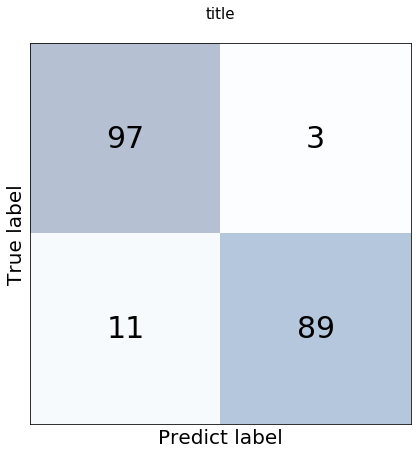

In [81]:
# print('混淆矩阵输出:\n',confusion_matrix(test_y,pred,labels=[0, 1]))#混淆矩阵输出
print('分类报告:\n', classification_report(test_y, pred,labels=[0, 1]))#分类报告输出

plt.rc('font', size=30) 
fig, axis = plt.subplots(1,1, figsize= (7, 7))
axis.set_ylabel('True label', size = 15)
axis.set_xlabel('Predict label', size = 15)
confmat = confusion_matrix(test_y,pred,labels=[0, 1])
axis.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
axis.set_title('title')
axis.set_xticks([])
axis.set_yticks([])
for idx_i in range(confmat.shape[0]):
    for idx_j in range(confmat.shape[1]):
        axis.text(x=idx_j, y=idx_i, s=confmat[idx_i, idx_j], va='center', ha='center')

for item in ( [axis.xaxis.label, axis.yaxis.label] ):
    item.set_fontsize(20)
axis.title.set_fontsize(15)


https://blog.csdn.net/m0_37725003/article/details/81095555
https://blog.csdn.net/shinian1987/article/details/50384518
https://zhpmatrix.github.io/2019/06/29/sklearn-classification-report/
https://chrome.google.com/webstore/detail/katalon-recorder-selenium/ljdobmomdgdljniojadhoplhkpialdid?hl=zh-TW